In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option('display.width', 1000)

In [3]:
def column_stats(df, column_name):
    n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")

In [4]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

# UniRef90 - Virus Host DB mapping

In [5]:
input_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_virushostdb_hosts_pruned_metadata_species_vertebrates_w_seq.csv")

In [6]:
df = pd.read_csv(input_file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [7]:
print("df size = ", df.shape)
df.head()

df size =  (459807, 9)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq,seq_len
0,UniRef90_A0A023HI16,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,MLPLETIGAIIALVIAGIIAIVVWTIVYIEYRKLLRQKKIDRLIDR...,82
1,UniRef90_A0A023HI18,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,MRVKGIRKNCPHLWRWGTMLLGMLMICSAAEQLWVTVYYGVPVWKE...,851
2,UniRef90_A0A023HIB6,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,MEPVDPNLEPWNHPGSKPTTACSKCYCKKCCWHCQLCFLKKGLGIS...,101
3,UniRef90_A0A023HQ48,28875,9534,Rotavirus A,species,Chlorocebus aethiops,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218
4,UniRef90_A0A023HQ48,28875,9606,Rotavirus A,species,Homo sapiens,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218


In [8]:
column_stats(df, "virus_name")

Number of unique values = 1291
                                             virus_name  virus_name_count  virus_name_percent
0                        Human immunodeficiency virus 1            319333           69.449356
1                                     Hepatitis B virus             27870            6.061239
2                                   Hepacivirus hominis             18589            4.042783
3                                      Microviridae sp.              9544            2.075653
4                               Paslahepevirus balayani              9196            1.999970
5                                          Cowpox virus              8294            1.803800
6                                     Lyssavirus rabies              5388            1.171796
7                                           Rotavirus A              5276            1.147438
8                         Simian immunodeficiency virus              4106            0.892983
9                            

In [9]:
column_stats(df, "virus_host_name")

Number of unique values = 405
                  virus_host_name  virus_host_name_count  virus_host_name_percent
0                    Homo sapiens                 376246                81.826940
1                 Pan troglodytes                  17892                 3.891198
2                      Bos taurus                   8259                 1.796188
3            Chlorocebus aethiops                   8111                 1.764001
4                      Sus scrofa                   3833                 0.833611
5                   Gallus gallus                   1877                 0.408215
6                    Mus musculus                   1827                 0.397341
7                     Felis catus                   1797                 0.390816
8                  Paguma larvata                   1642                 0.357106
9                  Macaca mulatta                   1462                 0.317959
10              Rattus norvegicus                   1376            

min seq len = 11
max seq len = 8249


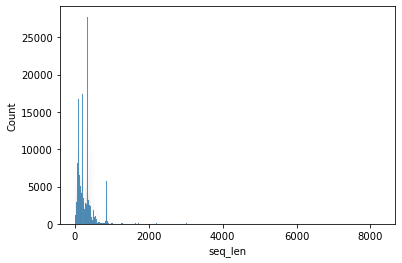

     start     end   count  percentage
0     11.0   697.5  430738   93.678000
1    697.5  1384.0   26225    5.703480
2   1384.0  2070.5    1142    0.248365
3   2070.5  2757.0     833    0.181163
4   2757.0  3443.5     716    0.155718
5   3443.5  4130.0      52    0.011309
6   4130.0  4816.5      32    0.006959
7   4816.5  5503.0       6    0.001305
8   5503.0  6189.5       5    0.001087
9   6189.5  6876.0      24    0.005220
10  6876.0  7562.5      21    0.004567
11  7562.5  8249.0      13    0.002827


In [10]:
print_seq_len_histogram(df, n_bins=12)

In [23]:
count_df = df[["virus_name", "virus_host_name", "uniref90_id"]].groupby(["virus_name", "virus_host_name"]).count().reset_index()

In [25]:
count_df.sort_values("uniref90_id", ascending=False)

,virus_name,virus_host_name,uniref90_id
667,Human immunodeficiency virus 1,Homo sapiens,319333
634,Hepacivirus hominis,Homo sapiens,18589
637,Hepatitis B virus,Homo sapiens,13935
638,Hepatitis B virus,Pan troglodytes,13935
811,Microviridae sp.,Bos taurus,4772
812,Microviridae sp.,Homo sapiens,4772
894,Microvirus sp.,Homo sapiens,3022
666,Human immunodeficiency virus,Homo sapiens,2297
1269,Simian immunodeficiency virus,Pan troglodytes,2053
1268,Simian immunodeficiency virus,Chlorocebus aethiops,2053


# UniRef90 - UniProt mapping


In [20]:
input_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_uniprot_hosts_pruned_metadata_species_mammals_or_aves_w_seq.csv")

In [21]:
df = pd.read_csv(input_file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [22]:
print("df size = ", df.shape)
df.head()

df size =  (370517, 9)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq,seq_len
0,UniRef90_L0BZH8,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPLVTVKIGGQXXEALLDTGADDTVLEDINLPGKWKPXM...,366
1,UniRef90_L0BZI0,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEDMSLPGRWKPKM...,340
2,UniRef90_L0BZI1,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,ELENEGKISKIGPENPYNTPVFAIKKKNSTKWRKVVDFRELNKRTQ...,199
3,UniRef90_L0BZI3,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPIVTIKVGGQLKEALLDTGADDTVLEEMXLPGXWKPKM...,366
4,UniRef90_L0BZI5,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,ELEKEGKISKIGPENPYNTPIFAIKKKNSXKWRKXVDFRELNKRTQ...,199


In [23]:
column_stats(df, "virus_name")

Number of unique values = 222
                                            virus_name  virus_name_count  virus_name_percent
0                       Human immunodeficiency virus 1            318863           86.058939
1                                    Hepatitis B virus             27783            7.498441
2                              Paslahepevirus balayani              6494            1.752686
3                            African swine fever virus              4282            1.155682
4                                         Cowpox virus              2274            0.613737
5                        Simian immunodeficiency virus              2004            0.540866
6                       Human immunodeficiency virus 2              1599            0.431559
7                                            Orf virus               969            0.261526
8                                      Monkeypox virus               712            0.192164
9                                Hepatit

In [24]:
column_stats(df, "virus_host_name")

Number of unique values = 139
                virus_host_name  virus_host_name_count  virus_host_name_percent
0                  Homo sapiens                 338132                91.259510
1               Pan troglodytes                  16951                 4.574959
2                    Sus scrofa                   2547                 0.687418
3                  Mus musculus                   1251                 0.337636
4        Potamochoerus larvatus                   1044                 0.281768
5      Phacochoerus aethiopicus                   1044                 0.281768
6        Phacochoerus africanus                   1044                 0.281768
7                 Gallus gallus                    834                 0.225091
8          Chlorocebus aethiops                    828                 0.223472
9         Cercopithecus hamlyni                    815                 0.219963
10        Bandicota bengalensis                    812                 0.219153
11        

min seq len = 11
max seq len = 7217


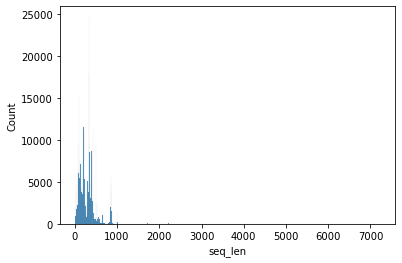

     start     end   count  percentage
0     11.0   611.5  343915   92.820302
1    611.5  1212.0   25516    6.886594
2   1212.0  1812.5     608    0.164095
3   1812.5  2413.0     335    0.090414
4   2413.0  3013.5      97    0.026180
5   3013.5  3614.0      14    0.003779
6   3614.0  4214.5      16    0.004318
7   4214.5  4815.0      10    0.002699
8   4815.0  5415.5       0    0.000000
9   5415.5  6016.0       0    0.000000
10  6016.0  6616.5       0    0.000000
11  6616.5  7217.0       6    0.001619


In [27]:
print_seq_len_histogram(df, n_bins=12)